In [5]:
#import face_recognition  #not used in this project yet
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
import pandas as pd
import os
import csv
import numpy as np

import time
import threading

from fastai.vision import *
from fastai.metrics import error_rate

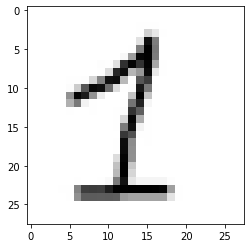

In [6]:
# load the example image
image = cv2.imread("data/testimg_num_1.jpg")

# pre-process the image by resizing it, converting it to
# graycale, blurring it, and computing an edge map
#image = imutils.resize(image, height=500)
image = cv2.resize(image,(28,28), interpolation = cv2.INTER_AREA) 

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (1, 1), 0)
edged = cv2.Canny(blurred, 50, 200, 255)



#plt.imsave("data/testimg_num_1_out.jpg",edged, cmap='gray', vmin=0, vmax=255)
#cv2.imwrite('data/testimg_num_1_out2.jpg', edged)


plt.imshow(blurred, cmap='gray', vmin=0, vmax=255)

In [9]:
path = untar_data(URLs.MNIST,'./data/tmp_file','./data/mnist')


In [11]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path,train = "training",valid = "testing", ds_tfms=tfms, size=26)

In [14]:
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

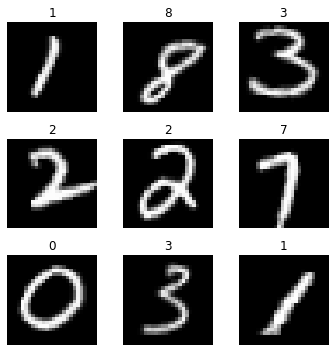

In [12]:
data.show_batch(rows=3, figsize=(5,5))

In [15]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [17:21<00:00, 44.9kB/s]


In [16]:
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.470297,0.245246,0.922800,14:00
1,0.277609,0.123432,0.960600,14:19


In [1]:
out_path = learn.save('numdet_resnet18_1',return_path=True);

NameError: name 'learn' is not defined

In [2]:
learn.export('mnist_resnet18_full_1.pkl')

NameError: name 'learn' is not defined

In [168]:
out = data.train_ds[53100][0]
out.data[0].mean()
type(data.train_ds[53100][0].data)
out.shape

torch.Size([3, 26, 26])

In [3]:
image = cv2.imread("data/testimg_num_1.jpg")
image = cv2.resize(image,(26,26), interpolation = cv2.INTER_AREA) 

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
#edged = cv2.Canny(blurred, 50, 200, 255)
edged = cv2.cvtColor(blurred,cv2.COLOR_GRAY2RGB)

#blurred.shape
edged = np.clip(edged, 0, 255)
img = open_image('data/testimg_num_1.jpg')
img = img.resize((3,26,26))
test_img = Image(np.clip(pil2tensor(edged,np.float32).div_(-255).add_(1).mul_(3), 0, 1)     )

test_img
a = [test_img,test_img]
#learn.get_preds(ds_type=DatasetType.Test)
learn.get_preds(a)

NameError: name 'cv2' is not defined

In [280]:
learn.get_preds()

[tensor([[9.9944e-01, 2.2144e-04, 5.1881e-06,  ..., 2.8545e-05, 3.8476e-06,
          6.0121e-05],
         [9.9134e-01, 1.3620e-04, 2.7016e-04,  ..., 8.4671e-05, 2.6226e-04,
          1.4575e-03],
         [9.9943e-01, 8.2639e-05, 1.2314e-05,  ..., 4.4596e-05, 2.1058e-06,
          1.4000e-05],
         ...,
         [2.2829e-03, 1.1380e-03, 5.1254e-04,  ..., 3.0926e-03, 1.9964e-03,
          9.6040e-01],
         [1.2110e-05, 7.0685e-08, 5.5591e-06,  ..., 7.7315e-05, 3.1936e-04,
          9.9952e-01],
         [1.5446e-04, 4.3000e-04, 1.6475e-03,  ..., 2.4357e-03, 5.5889e-03,
          9.8595e-01]]), tensor([0, 0, 0,  ..., 9, 9, 9])]

In [5]:
#load learner
learn = load_learner("./data/mnist/mnist_png","mnist_resnet18_full_1.pkl")

In [4]:
#1
image = cv2.imread("data/test_ladlecar_1.jpg")
#image = cv2.resize(image,(26,26), interpolation = cv2.INTER_AREA)



gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
colored = cv2.cvtColor(blurred,cv2.COLOR_GRAY2RGB)

colored = np.clip(colored, 0, 255)
test_img1 = Image(np.clip(pil2tensor(colored,np.float32).div_(-255).add_(1), 0, 1))

##2
test_img2 = open_image('data/testimg_num_1.jpg')
test_img2 = test_img2.resize((3,26,26))

test_img1

NameError: name 'cv2' is not defined

In [27]:


get_result(learn,test_img2)

4

In [7]:
#picture processing
image = cv2.imread("data/test_ladlecar_1.jpg")
#initial size
h0,w0 = image.shape[:2]

#crop
h1,w1,h1_off,w1_off = 110,130,20,40
image = image[h1_off:h1+h1_off,w1_off:w1+w1_off,:]

#resize
h2 = 100
w2 = int(h2*w1/h1)
image = cv2.resize(image,(w2,h2), interpolation = cv2.INTER_AREA)

#define parsing frame. Should consist of "windows"
win_h,win_w,h_step,w_step,h_count,w_count = 25,25,10,10,5,8
frame_h = h_step*(h_count-1)+win_h
frame_w = w_step*(w_count-1)+win_w

def get_result(model,image):
    list_result = list(model.predict(image)[2])
    max_value = max(list_result)
    max_index = list_result.index(max_value)
    return max_index,max_value

predict_list = []
img_list = []
if frame_h<h2 and frame_w<w2:
    print("Frame has proper size")
    for h in range(h_count):
        for w in range(w_count):
            #image = cv2.rectangle(image, (w*w_step, h*h_step), (win_w+w*w_step, win_h+h*h_step), (0, 0, 255), 1)
            #test_img_fai = Image(np.clip(pil2tensor(image[h*h_step:win_h+h*h_step,w*w_step:win_w+w*w_step,:],np.float32).div_(-255).add_(1).mul_(3), 0, 1))
            test_img_cv = image[h*h_step:win_h+h*h_step,w*w_step:win_w+w*w_step,:]
            test_img_cv = cv2.resize(test_img_cv,(26,26), interpolation = cv2.INTER_AREA)
            gray = cv2.cvtColor(test_img_cv, cv2.COLOR_BGR2GRAY)
            blurred = cv2.GaussianBlur(gray, (1, 1), 0)
            colored = cv2.cvtColor(blurred,cv2.COLOR_GRAY2RGB)
            colored = np.clip(colored, 0, 255)
            test_img_cv = Image(np.clip(pil2tensor(colored,np.float32).div_(-255).add_(0.5).mul_(3).add_(0.5), 0, 1))
            img_list.append(test_img_cv)
            predict_list.append(get_result(learn,test_img_cv))
            
else:
    print("Error: Frame is bigger than image")



#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #for testing
#plt.imshow(image,)


for i in range(len(predict_list)):
    img_list[i].show(title = predict_list[i],figsize=(3,3))
    


Frame has proper size


NameError: name 'learn' is not defined

In [187]:
dir(cv2)

['',
 'ACCESS_FAST',
 'ACCESS_MASK',
 'ACCESS_READ',
 'ACCESS_RW',
 'ACCESS_WRITE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'AGAST_FEATURE_DETECTOR_AGAST_5_8',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12D',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12S',
 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION',
 'AGAST_FEATURE_DETECTOR_OAST_9_16',
 'AGAST_FEATURE_DETECTOR_THRESHOLD',
 'AKAZE',
 'AKAZE_DESCRIPTOR_KAZE',
 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT',
 'AKAZE_DESCRIPTOR_MLDB',
 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT',
 'AKAZE_create',
 'AgastFeatureDetector',
 'AgastFeatureDetector_AGAST_5_8',
 'AgastFeatureDetector_AGAST_7_12d',
 'AgastFeatureDetector_AGAST_7_12s',
 'AgastFeatureDetector_NONMAX_SUPPRESSION',
 'AgastFeatureDetector_OAST_9_16',
 'AgastFeatureDetector_THRESHOLD',
 'AgastFeatureDetector_create',
 'Algorithm',
 'AlignExposures',
 'AlignMTB',
 'AsyncArray',
 'BFMatcher',
 'BFMatcher_create',
 'BORDER_CONSTANT',
 'BORDER_DEFAULT',
 'BORDER_ISOLATED',
 'BORDER_REFLECT',
 'BORDER_REFLECT101',
